# Recreating Images from Article 

## The following code recreates graph 1a of the research paper. 

https://genome.cshlp.org/content/27/7/1139/F2.expansion.html


Text(0.5, 0, 'Cell Type')


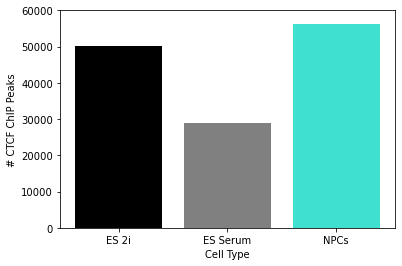

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_es_2i1_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S5.xlsx', header = 3)
df_es_serum_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S6.xlsx', header = 3)
df_npc1_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S7.xlsx', header = 3)
df_es2i2_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S8.xlsx', header = 3)
df_npc2_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S9.xlsx', header = 3)
df_es2iess_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S10.xlsx', header = 3)
df_all_peaks = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S11.xlsx', header = 3)
df_yy1npc_peaks = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S12.xlsx', header = 3)
df_yy1esserum_peaks= pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S13.xlsx', header = 3)
df_es_enhancer_annotations = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S14.xlsx', header = 3)
df_npc_enhancer_annotations = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S15.xlsx', header = 3)

##Import the dataframes with dictionary 
    
esserum_val = df_es_serum_ctcf.shape[0]
npc_val = df_npc1_ctcf.shape[0]
es2i_val = df_es_2i1_ctcf.shape[0]

df1 = {'Cell Type':[ 'ES 2i', 'ES Serum', 'NPCs'],'# CTCF ChIP Peaks': [esserum_val, npc_val,es2i_val ]}

fig1 = plt.bar(df1['Cell Type'], df1['# CTCF ChIP Peaks'], color=['Black', 'Grey', 'Turquoise'])
fig1 = plt.ylabel('# CTCF ChIP Peaks')
fig1 = plt.xlabel('Cell Type')
ay = plt.gca()
ay.set_ylim([0,60000])


print(fig1)


In [5]:
df_npc1_ctcf

,#chr,start,end,name,score,signalValue,pValue,qValue,peak,Unnamed: 9,28860
0,chr1,4322662,4322893,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,144,6.87500,14.42945,11.63835,113,NaN,NaN
1,chr1,4336371,4336522,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,179,8.91892,17.99991,15.11715,105,NaN,NaN
2,chr1,4373031,4373165,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,179,8.91892,17.99991,15.11715,35,NaN,NaN
3,chr1,4506748,4506933,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,402,18.21393,40.26894,36.92000,64,NaN,NaN
4,chr1,4758436,4758774,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,790,25.94595,79.08524,74.76299,201,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28855,chrX,166236954,166237110,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,191,10.48681,19.14016,16.23458,73,NaN,NaN
28856,chrX,166300933,166301115,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,304,15.00000,30.41432,27.27226,68,NaN,NaN
28857,chrX,166417046,166417363,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,445,12.74958,44.51430,41.07328,205,NaN,NaN
28858,chrX,166424734,166425255,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,938,12.65306,93.85211,89.16364,371,NaN,NaN


## The following code is for graph 2a of the research paper. 

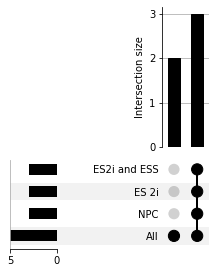

In [6]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

df2 = from_contents({'NPC': df_npc2_ctcf, 'ES 2i': df_es2i2_ctcf, 'ES2i and ESS': df_es2iess_ctcf, 'All': df_all_peaks})
df2

plt = UpSet(df2, subset_size='count').plot()

#I think the ES Serum data is missing. I cannot find it in any of the excel files. Here is an attempt of an upset plot. 

In [6]:
import bioframe
import numpy as np

bb1 = bioframe.count_overlaps(df_es_serum_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1.rename(columns={'count':'count1'},inplace=True)
bb1 = bioframe.count_overlaps(bb1, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1.rename(columns={'count':'count_es_npc'},inplace=True)

np.sum( (bb1['count1']==0) * (bb1['count_es_npc']==0))

#This value is for ES Serum only. 

3177

In [139]:
bb1a = bioframe.count_overlaps(df_es_serum_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1a.rename(columns={'count':'count1'},inplace=True)


bb1a = bioframe.count_overlaps(bb1a, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1a.rename(columns={'count':'count_es_npc'},inplace=True)

np.sum( (bb1a['count1']>=1) * (bb1a['count_es_npc']==0))

#This value is for ES Serum and ES 2i.  

20134

In [158]:
bb6 = bioframe.count_overlaps(df_npc1_ctcf, df_es_serum_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb6.rename(columns={'count':'count6'},inplace=True)
print(np.sum(bb6['count6']==0))

bb6 = bioframe.count_overlaps(bb6, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb6.rename(columns={'count':'count_npc'},inplace=True)
np.sum((bb6['count6']==0) * (bb6['count_npc']==0))

#This value is for NPC only. The function does not work. 

1765


0

In [145]:
bb2a = bioframe.count_overlaps(df_es_serum_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count2a'},inplace=True)
bb2a = bioframe.count_overlaps(bb2a, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count_npc'},inplace=True)
np.sum((bb2a['count2a']>=1) * (bb2a['count_npc']==0))

#This value is for ES and NPC. The function does not work. 

0

In [65]:
bb2 = bioframe.count_overlaps(df_es_2i1_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count2'},inplace=True)
bb2 = bioframe.count_overlaps(bb2, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb2['count2']==0) * (bb2['count_es_serum']==0))

#This value is for ES 2i only. 

8832

In [143]:
bb2 = bioframe.count_overlaps(df_es_2i1_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count2'},inplace=True)
bb2 = bioframe.count_overlaps(bb2, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb2['count2']>=1) * (bb2['count_es_serum']==0))

#This value is for ES 2i and NPC.

641

In [19]:
bb3 = bioframe.count_overlaps(df_npc1_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count3'},inplace=True)
bb3 = bioframe.count_overlaps(bb3, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb3['count3']==0) * (bb3['count_es_serum']==0))

#This value is for NPC only. 

1119

In [144]:
bb3 = bioframe.count_overlaps(df_npc1_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count3'},inplace=True)
bb3 = bioframe.count_overlaps(bb3, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum((bb3['count3']>=1) * (bb3['count_es_serum']==0))

#This value is for NPC and ES_2i. 
#I am not sure I understand why I get two different values when I switch the data frame order and am doing left join essentially. 

646

In [159]:
df_es_2i1_ctcf

,#chr,start,end,name,score,signalValue,pValue,qValue,peak
0,chr1,3002708,3002871,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,170,9.50311,17.04867,14.64283,49
1,chr1,4132662,4132954,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,631,24.46086,63.14300,60.10382,144
2,chr1,4163475,4163685,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,239,12.14286,23.90226,21.38447,65
3,chr1,4218330,4218547,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,357,16.36646,35.79780,33.11425,103
4,chr1,4322616,4322910,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,436,19.00621,43.69802,40.90810,146
...,...,...,...,...,...,...,...,...,...
56133,chrX,166428012,166428519,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,2343,28.03885,234.36502,228.97180,247
56134,chrY,209430,209604,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,197,10.55901,19.72768,17.27358,65
56135,chrY,556526,556763,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,364,12.81250,36.41721,33.72281,104
56136,chrY,2781654,2782065,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,970,5.31780,97.06052,93.55126,199


In [163]:
pd.unique(df_es_2i1_ctcf['#chr'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY'], dtype=object)

In [164]:
pd.unique(df_es_serum_ctcf['#chr'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY'], dtype=object)

In [162]:
df_es_2i1_ctcf.dtypes

#chr            object
start            int64
end              int64
name            object
score            int64
signalValue    float64
pValue         float64
qValue         float64
peak             int64
dtype: object

In [161]:
df_es_serum_ctcf.dtypes

#chr            object
start            int64
end              int64
name            object
score            int64
signalValue    float64
pValue         float64
qValue         float64
peak             int64
Unnamed: 9     float64
Unnamed: 10    float64
50185          float64
dtype: object

In [165]:
a = 0
for index in df_es_2i1_ctcf.index:
    chr1 = df_es_2i1_ctcf['#chr']
    start1 = df_es_2i1_ctcf.start
    end1 = df_es_2i1_ctcf.end
    for index in df_es_serum_ctcf.index:
        chr2 = df_es_serum_ctcf['#chr']
        start2 = df_es_serum_ctcf.start
        end2 = df_es_serum_ctcf.end
    
    print(start1)
    print(start2)
    
    if (chr1 == chr2):
        print("Bob is your uncle")
    
    
    if ((chr1 == chr2) and (start2 >= start1 and start2 <= end1 or end2 >= start1 and end2 <= end1)):
       a = a+1
    
print (a)
 


0          3002708
1          4132662
2          4163475
3          4218330
4          4322616
           ...    
56133    166428012
56134       209430
56135       556526
56136      2781654
56137      2891014
Name: start, Length: 56138, dtype: int64
0          3002642
1          3601385
2          4132637
3          4218321
4          4287277
           ...    
50180    166424641
50181    166427952
50182       556503
50183      2781663
50184      2890825
Name: start, Length: 50185, dtype: int64


ValueError: Can only compare identically-labeled Series objects

In [172]:
df_es_2i1_ctcf['#chr'][index]

'chr8'

In [168]:
df_es_2i1_ctcf.index

RangeIndex(start=0, stop=56138, step=1)

In [167]:
chr2#, start2

0        chr1
1        chr1
2        chr1
3        chr1
4        chr1
         ... 
50180    chrX
50181    chrX
50182    chrY
50183    chrY
50184    chrY
Name: #chr, Length: 50185, dtype: object

In [48]:
bioframe.overlap( bioframe.overlap( a, b), c)

NameError: name 'a' is not defined

In [111]:
import bioframe 
df1 = pd.DataFrame([
    ['chr1', 1, 2],
    ['chr1', 3, 4],
    ['chr1', 8, 9],
    ['chr1', 12, 13],
    ],
    columns=['#chr', 'start', 'end']
)
df2 = pd.DataFrame([
    ['chr1', 0, 0],
    ['chr1', 8, 9],
    ['chr1', 9, 10],
    ['chr1', 9, 10],
    ['chr1', 9, 10],
    ['chr1', 11, 11],
    ['chr1', 14, 14],
    ],
    columns=['#chr', 'start', 'end']
)
df3 = pd.DataFrame([
    ['chr1', 0, 10],
    ['chr1', 8, 9],
    ['chr1', 9, 10],
    ['chr1', 9, 10],
    ['chr1', 9, 9],
    ['chr1', 10, 10],
    ['chr1', 14, 15],
    ],
    columns=['#chr', 'start', 'end']
)

bb3 = bioframe.count_overlaps(df1, df2, cols1=['#chr','start','end'],cols2=['#chr','start','end'])

print (bb3)
#bb3 = bioframe.count_overlaps(bb3, df3, cols1=['#chr','start','end'],
                 #      cols2=['#chr','start','end'])
#bb3.rename(columns={'count':'overlap2'},inplace=True)
#s = np.sum((bb3['count']==1))
print (bb3)




              


   #chr  start  end  count
0  chr1      1    2      0
1  chr1      3    4      0
2  chr1      8    9      1
3  chr1     12   13      0
   #chr  start  end  count
0  chr1      1    2      0
1  chr1      3    4      0
2  chr1      8    9      1
3  chr1     12   13      0


NameError: name 's' is not defined

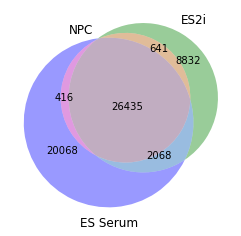

In [60]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

npconly = df_npc2_ctcf.shape[0]
es2ionly = df_es2i2_ctcf.shape[0]
es2iess = df_es2iess_ctcf.shape[0]
all = df_all_peaks.shape[0]

venn3(subsets = (npconly,es2ionly,641, es2iess, 416, 2068, all), set_labels = ('NPC', 'ES2i', "ES Serum"))
plt.show()

#Upset plots seem useful, but I wanted to recreate the venn diagram. Here it is. 

## Function calls to identify overlaps. 

In [123]:
import pandas as pd

df1 = pd.DataFrame([
    ['chr1', 1, 2],
    ['chr1', 3, 4],
    ['chr1', 8, 9],
    ['chr1', 12, 13]
    ],
    columns=['#chr', 'start', 'end']
)
df2 = pd.DataFrame([
    ['chr1', 0, 3],
    ['chr1', 4, 6],
    ['chr1', 7, 9],
    ],
    columns=['#chr', 'start', 'end']
)
df3 = pd.DataFrame([
    ['chr1', 0, 4],
    ['chr1', 5, 8],
    ['chr1', 10, 12],
    ],
    columns=['#chr', 'start', 'end']
)

## Use count_overlaps - still need outer loop over outer larger data frames. Input as list and then df1(df1,df2) and df2(df1,df3) then loop over that list. 
## Itertools - cool python library - google for an option 
## Have the list and generate the combination of indices and iterate over pairs by going through indicies 
## Tuples and enumerate to iterate through different data frames 
 
def onlydf1(df1, df2, df3):
    for index in df1.index:
        count = 0
        chr1 = df1['#chr']
        print (chr1)
        start1 = df1.start
        end1 = df1.end
        for index in df2.index:
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end
            if (chr1 != chr2 and chr1 != chr3):
                count = count+1
            if ((chr1 == chr2) and (start1 < start2 or start1 > end2 and end1 < start2 or end1 < start2)):
                if((chr1 == chr3) and (start1 < start3 or start1 > end3 and end1 < start3 or end1 < start3)):
                    count = count+1
    return (count)

def onlydf2(df1, df2, df3):
    count = 0
    for index0 in df2.index0:
        chr2 = df2['#chr']
        start2 = df2.start
        end2 = df2.end
        for index1 in df3.index1:
            chr1 = df1['#chr']
            start1 = df1.start
            end1 = df1.end
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end
            if (chr2 != chr1 and chr2 != chr3):
                count = count+1
            if ((chr1 == chr2) and (start2 < start1 or start2 > end1 and end2 < start1 or end2 < start1)):
                if((chr1 == chr3) and (start2 < start3 or start2 > end3 and end2 < start3 or end2 < start3)):
                    count = count+1
    return (count)

def onlydf3(df1, df2, df3):
    count = 0
    for index0 in df3.index0:
        chr3 = df3['#chr']
        start3 = df3.start
        end3 = df3.end
        for index1 in df3.index1:
            chr1 = df1['#chr']
            start1 = df1.start
            end1 = df1.end
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end
            if (chr3 != chr1 and chr3 != chr2):
                count = count+1
            if ((chr3 == chr2) and (start3 < start2 or start3 > end2 and end3 < start2 or end3 < start2)):
                if((chr3 == chr1) and (start3 < start1 or start3 > end1 and end3 < start2 or end3 < start2)):
                    count = count+1
    return (count)

def overlap0(df1, df2, df3):
    df4
    ##for loop to iterate over all genomic intervals and compare each interval to other dfs 
    ##this fails to account for comparing dfs of different sizes
    for index0 in df1.index0:
        count = 0
        chr1 = df1['#chr']
        start1 = df1.start
        end1 = df1.end
        for index1 in df2.index1:
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end.index1
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end.index1
            ##creation of 2d array to store values
            if ((chr1 == chr2) and (start1 < start2 or start1 > end2 and end1 < start2 or end1 < start2)):
                if((chr1 == chr3) and (start1 < start3 or start1 > end3 and end1 < start3 or end1 < start3)):
                    df4[index0][index1] = 1
    count = 0
    
    for index1 in df4.index1: 
        count = count + df4.index1
    return (count)

def overlap1(df1, df2, df3):
    df4
    ##for loop to iterate over all genomic intervals and compare each interval to other dfs 
    ##this fails to account for comparing dfs of different sizes
    for index0 in df1.index0:
        count = 0
        chr1 = df1['#chr']
        start1 = df1.start
        end1 = df1.end
        for index1 in df2.index1:
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end.index1
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end.index1
            ##creation of 2d array to store values
            if ((chr1 == chr2) and (start1 < start2 or start1 > end2 and end1 < start2 or end1 < start2)):
                if((chr1 == chr3) and (start1 < start3 or start1 > end3 and end1 < start3 or end1 < start3)):
                    df4[index0][index1] = 1
    count = 0
    ##sum all values in order to determine count_overlaps
    for index1 in df4.index1: 
        count = count + df4.index1
        
    return (count)

def overlap2(df1, df2, df3):
    df4
    ##for loop to iterate over all genomic intervals and compare each interval to other dfs 
    ##this fails to account for comparing dfs of different sizes
    for index0 in df1.index0:
        count = 0
        chr1 = df1['#chr']
        start1 = df1.start
        end1 = df1.end
        for index1 in df2.index1:
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end.index1
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end.index1
            ##creation of 2d array to store values
            if ((chr1 == chr2) and (start1 < start2 or start1 > end2 and end1 < start2 or end1 < start2)):
                if((chr1 == chr3) and (start1 < start3 or start1 > end3 and end1 < start3 or end1 < start3)):
                    df4[index0][index1] = 1
    count = 0
    ##sum all values in order to determine count_overlaps
    for index1 in df4.index1: 
        count = count + df4.index1
        
    return (count)

def alloverlap(df1,df2,df3): 
    df4
    ##for loop to iterate over all genomic intervals and compare each interval to other dfs 
    ##this fails to account for comparing dfs of different sizes
    for index0 in df1.index0:
        count = 0
        chr1 = df1['#chr']
        start1 = df1.start
        end1 = df1.end
        for index1 in df2.index1:
            chr2 = df2['#chr']
            start2 = df2.start
            end2 = df2.end.index1
            chr3 = df3['#chr']
            start3 = df3.start
            end3 = df3.end.index1
            ##creation of 2d array to store values
            if ((chr1 == chr2) and (start1 < start2 or start1 > end2 and end1 < start2 or end1 < start2)):
                if((chr1 == chr3) and (start1 < start3 or start1 > end3 and end1 < start3 or end1 < start3)):
                    df4[index0][index1] = 1
    count = 0
    ##sum all values in order to determine count_overlaps
    for index1 in df4.index1: 
        count = count + df4.index1
        
    return (count)

    
onlydf1(df1,df2,df3)


#data = pd.DataFrame(    
    #[[1, 0, 0],
     #[1, 0, 0],
     #[1, 0, 0],
     #[0, 0, 1],
     #[0, 0 ,1],
     #[1, 1, 1]],
#columns=['df1','df2','df3']
    #).astype(bool)

#i = from_indicators(data)
### prints the size of each category

##print(i.groupby(i.index).size())
### prints the multiindex for the particular category
##grp_index = i.groupby(i.index).size().index[2]
##print(grp_index)

### print a human-readable name for overlap combination
##n = np.array((i.index.names))
##category_name = '-'.join(n[list(grp_index)])
    

0    chr1
1    chr1
2    chr1
3    chr1
Name: #chr, dtype: object


ValueError: Can only compare identically-labeled Series objects

Programming issues: 
1) Should I just make a vector and values to it to store overlaps? How do I know the size of the vector? Should I just append and 0 or 1 depending on the overlap? Still sum all values though in order to find count
2) What am I doing wrong comparing start and stop points? Why does it not like it? They are the same data type. Do I need to same them the same variable as well? 

Approach: 
Individual Counts - just compare start and stop and be exhaustive to ensure that one does not overlap and sum the total count - no need for arrays just add numbers to keep tally 
1 Overlap: Need to develop array/vector to keep track of all the values in the data frame and then iterate over only one row/column to find that value 
2 Overlap: Using same array add values for each row (how many for loops do I need here? What if I am comparing many dfs? Come up with better way)(probably need new array to store all the sums) and then compare sums with expected count to pull full overlap (sum should = total genomic intervals) -- Kinda lost on this part here need more advice 

Top-Level Issues: 
How do I do make this program capable of doing it for a large number of dataframes? 


In [12]:
import pandas as pd
import numpy as np
import bioframe as bf 
from upsetplot import from_indicators

df_ES2i = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S5.xlsx', header = 3)
df_ESS = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S6.xlsx', header = 3)
df_NPC = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S7.xlsx', header = 3)

df1 = pd.DataFrame([
    ['chr1', 3, 6],
    ['chr1', 4, 7]],
    columns=['#chr', 'start', 'end']
)

df2 = pd.DataFrame([
    ['chr1', 3, 6]],
    columns=['#chr', 'start', 'end']
)

df3 = pd.DataFrame([
    ['chr1', 8, 9],
    ['chr1', 3, 5]],
    columns=['#chr', 'start', 'end']
)


### function to create matrix for upset plot 
def make_indicators(list_of_dfs):
    name_arr = ['ES 2i', 'ES Serum', 'NPC']
    #total count of all dfs 
    num_df = len(list_of_dfs)
    #df of all intervals 
    df_tot = pd.concat(list_of_dfs) 
    print (df_tot)
    i = 0
    j = 0 
    for df in list_of_dfs:
        #if any given interval in df_tot overlaps any interval in df
        df_tot = bf.count_overlaps(df_tot, df,
                                             cols1=['#chr','start','end'], cols2=['#chr','start','end'])
        df_tot['count'] = df_tot['count'].astype(bool)
        df_tot.rename(columns={'count':name_arr[i]},inplace=True)
        i = i + 1
    return df_tot
#df_es_2i1_ctcf,df_es_serum_ctcf,df_npc1_ctcf
list_of_dfs = [df_ES2i,df_ESS,df_NPC]
overlap_indicators = make_indicators(list_of_dfs)
overlap_indicators = overlap_indicators.drop(labels=["Unnamed: 9", "Unnamed: 10", "50185", "28860"], axis=1)
display (overlap_indicators)
##overlap_indicators = overlap_indicators.drop(labels=["#chr", "start","end"], axis=1)





#Failed test cases - when the start and stop are the same value; and final data set


       #chr      start        end  \
0      chr1    3002708    3002871   
1      chr1    4132662    4132954   
2      chr1    4163475    4163685   
3      chr1    4218330    4218547   
4      chr1    4322616    4322910   
...     ...        ...        ...   
28855  chrX  166236954  166237110   
28856  chrX  166300933  166301115   
28857  chrX  166417046  166417363   
28858  chrX  166424734  166425255   
28859  chrX  166428065  166428396   

                                                    name  score  signalValue  \
0      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    170      9.50311   
1      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    631     24.46086   
2      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    239     12.14286   
3      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    357     16.36646   
4      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    436     19.00621   
...                                                  ...    ...          ..

KeyError: "['50185' '28860'] not found in axis"

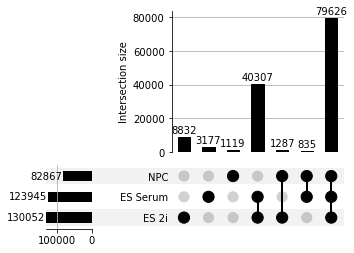

In [131]:
from upsetplot import UpSet
UpSet(from_indicators(["ES 2i", "ES Serum", "NPC"],
                      data=overlap_indicators), show_counts = True)
#plt = UpSet(overlap_indicators, subset_size='sum', show_counts=True).plot()

140358612433776
[0 1 2]


Enter your value5
